In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
import sklearn
import re
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Siamese networks are networks that have two or more identical sub-networks in them.

Siamese networks seem to perform well on similarity tasks and have been used for tasks like sentence semantic similarity, recognizing forged signatures and many more.

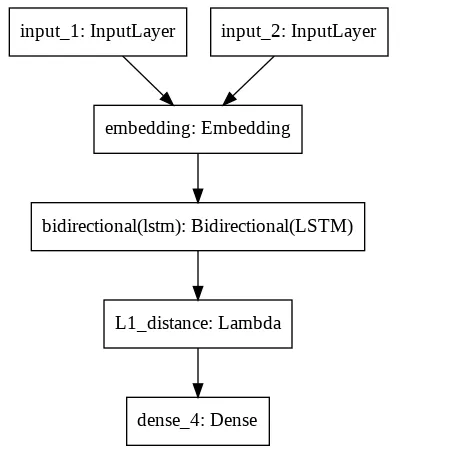

In [2]:
# Load the Quora Question Pairs dataset
df = pd.read_csv('train.csv')
df1 = df.dropna().reset_index().drop('index',axis=1)
df1

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404282,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404283,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404284,404287,537928,537929,What is one coin?,What's this coin?,0
404285,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [3]:
df1['is_duplicate'].value_counts()

0    255024
1    149263
Name: is_duplicate, dtype: int64

.

'CREATE NEW DATA FRAME WITH BALANCED TARGET VALUES'

In [4]:
df2 = pd.concat([df1[df1['is_duplicate']==1].sample(5000),df1[df1['is_duplicate']==0].sample(5000)]).reset_index().drop('index',axis=1)
df2

,id,qid1,qid2,question1,question2,is_duplicate
0,29293,54214,54215,What would happen if everyone suddenly just we...,What If everyone on earth became vegetarian?,1
1,331344,458227,458228,How smart is artificial intelligence today ?,How smart is artificial intelligence?,1
2,312475,414313,436918,Why haven't we seen Jack Nicholson in any film...,Why isn't Jack Nicholson doing movies?,1
3,143684,1182,14297,How is time travel possible?,Time Travel Is It Possible?,1
4,267685,200004,35332,What are some conspiracies that turned out to ...,Has there been any major conspiracy theory tha...,1
...,...,...,...,...,...,...
9995,373026,249139,503793,Phase Transitions: How does water evaporate be...,What is the boiling point of sea water and how...,0
9996,251276,316093,58494,What is your biggest mistake in life?,Which are some of the biggest mistakes you hav...,0
9997,78399,17681,133695,Which are the best restaurants/pubs in Hyderab...,Which are the best restaurants/pubs in Mumbai ...,0
9998,389308,151986,521790,What is terminal velocity?,What is terminal velocity of a drone?,0


.

CREATE LIST OF QUESTION1 AND QUESTION2

In [5]:
lemmatizer = WordNetLemmatizer()
question1 = []

for i in range(0, len(df2)):
    try:
        review = re.sub('[^a-zA-Z]', ' ',df2.iloc[i]['question1'])
        review = review.lower()
        review = review.split()

        #review = [lemmatizer.lemmatize(word) for word in review if word not in stopwords.words('english')]
        review = ' '.join(review)
        question1.append(review)
    except:
        pass
   
question2 = []

for i in range(0, len(df2)):
    try:
        review = re.sub('[^a-zA-Z]', ' ',df2.iloc[i]['question2'])
        review = review.lower()
        review = review.split()

        #review = [lemmatizer.lemmatize(word) for word in review if word not in stopwords.words('english')]
        review = ' '.join(review)
        question2.append(review)
    except:
        pass
    
    
q1 = question1
q2 = question2
label = df2['is_duplicate']

combined = q1+q2

.

TOKENIZE THE WORDS AND CREATE PAD SEQUENCES

In [21]:
max_words = 10000
tok = Tokenizer(num_words=max_words, oov_token="<OOV>")
tok.fit_on_texts(combined)

seq1 = tok.texts_to_sequences(q1)
seq1 = pad_sequences(seq1, maxlen=50, padding='post')

seq2 = tok.texts_to_sequences(q2)
seq2 = pad_sequences(seq2, maxlen=50, padding='post')

In [10]:
seq1 = pd.DataFrame(seq1)
seq2 = pd.DataFrame(seq2)

seq = pd.concat([seq1,seq2],axis=1)
seq

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,3,42,206,26,667,2838,177,1400,1680,0,...,0,0,0,0,0,0,0,0,0,0
1,5,719,4,1140,780,396,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,17,1317,44,55,450,3251,5606,9,63,1564,...,0,0,0,0,0,0,0,0,0,0
3,5,4,66,224,111,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3,12,27,8309,31,1923,91,8,25,230,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2398,1,5,22,235,1,1468,208,2436,532,...,0,0,0,0,0,0,0,0,0,0
9996,3,4,35,422,1295,9,61,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,24,12,2,18,1377,7989,9,1088,8,291,...,0,0,0,0,0,0,0,0,0,0
9998,3,4,3757,2473,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
x_train, x_test, y_train, y_test = train_test_split(seq, label, test_size=0.2, random_state=42,stratify=label)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42,stratify=y_train)

In [12]:
embedding_dim = 100

# loading our embedding layer
emb = tf.keras.layers.Embedding(max_words, embedding_dim, input_length=50, trainable=False)

# define inputs
input1 = tf.keras.Input(shape=(50,))
input2 = tf.keras.Input(shape=(50,))

# apply embedding layer to inputs
e1 = emb(input1)
e2 = emb(input2)

# define LSTM layers
lstm_layer1 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True))
lstm_layer2 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16, return_sequences=True))
lstm_layer3 = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8))

# apply LSTM layers to embedded inputs
x1 = lstm_layer1(e1)
x1 = lstm_layer2(x1)
x1 = lstm_layer3(x1)

x2 = lstm_layer1(e2)
x2 = lstm_layer2(x2)
x2 = lstm_layer3(x2)

# compute Manhattan distance
mhd = lambda x: tf.keras.backend.abs(x[0] - x[1])

merged = tf.keras.layers.Lambda(function=mhd, output_shape=lambda x: x[0],
                                 name='L1_distance')([x1, x2])

# define output layer
preds = tf.keras.layers.Dense(1, activation='sigmoid')(merged)

# define model
model = tf.keras.Model(inputs=[input1, input2], outputs=preds)
model.compile(loss='binary_crossentropy', optimizer='adam',metrics='accuracy')

In [13]:
model.fit([x_train.iloc[:,:50], x_train.iloc[:,50:]], y_train, epochs=25, validation_data=([x_val.iloc[:,:50], x_val.iloc[:,50:]], y_val))

Epoch 1/25
200/200 [==============================] - 15s 40ms/step - loss: 0.6759 - accuracy: 0.5534 - val_loss: 0.6629 - val_accuracy: 0.6244
Epoch 2/25
200/200 [==============================] - 6s 32ms/step - loss: 0.6655 - accuracy: 0.6025 - val_loss: 0.6557 - val_accuracy: 0.6269
Epoch 3/25
200/200 [==============================] - 7s 33ms/step - loss: 0.6498 - accuracy: 0.6319 - val_loss: 0.6416 - val_accuracy: 0.6444
Epoch 4/25
200/200 [==============================] - 7s 34ms/step - loss: 0.6453 - accuracy: 0.6352 - val_loss: 0.6496 - val_accuracy: 0.6181
Epoch 5/25
200/200 [==============================] - 6s 32ms/step - loss: 0.6385 - accuracy: 0.6484 - val_loss: 0.6398 - val_accuracy: 0.6381
Epoch 6/25
200/200 [==============================] - 6s 32ms/step - loss: 0.6289 - accuracy: 0.6595 - val_loss: 0.6233 - val_accuracy: 0.6594
Epoch 7/25
200/200 [==============================] - 6s 32ms/step - loss: 0.6354 - accuracy: 0.6477 - val_loss: 0.6276 - val_accuracy: 0.652

In [19]:
pred = model.predict([x_test.iloc[:,:50],x_test.iloc[:,50:]])

predict = []

for i in pred:
    if i>0.50:
        predict.append(1)
    else:
        predict.append(0)
        

print(sklearn.metrics.classification_report(y_test.values,predict))

              precision    recall  f1-score   support

           0       0.72      0.62      0.67      1000
           1       0.67      0.75      0.71      1000

    accuracy                           0.69      2000
   macro avg       0.69      0.69      0.69      2000
weighted avg       0.69      0.69      0.69      2000

